<a href="https://colab.research.google.com/github/pzoliveira/DSDecisionTree/blob/main/DSDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os Dados

In [1]:
import pickle

In [2]:
with open('credito.pkl', 'rb') as f:
  X_credito_treino, y_credito_treino, X_credito_teste, y_credito_teste = pickle.load(f)

In [6]:
X_credito_treino.shape, y_credito_treino.shape

((22806, 3), (22806,))

# Treinando o Modelo

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
dtc_credito = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc_credito.fit(X_credito_treino, y_credito_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Previsão do Modelo

In [13]:
previsoes = dtc_credito.predict(X_credito_teste)

In [14]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
y_credito_teste

array([0, 0, 0, ..., 1, 0, 0])

# Métricas do Modelo

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
accuracy_score(y_credito_teste, previsoes)

0.8149360613810742

In [16]:
confusion_matrix(y_credito_teste, previsoes)

array([[6868,  876],
       [ 933, 1098]])

In [17]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7744
           1       0.56      0.54      0.55      2031

    accuracy                           0.81      9775
   macro avg       0.72      0.71      0.72      9775
weighted avg       0.81      0.81      0.81      9775



# Balanceamento dos Dados

In [18]:
import seaborn as sns

<Axes: ylabel='count'>

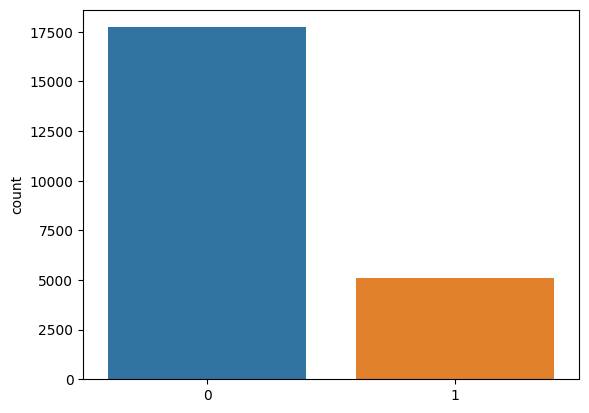

In [27]:
sns.countplot(x = y_credito_treino)

In [20]:
!pip install imbalanced-learn

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
sm = SMOTE(random_state=42)

In [24]:
X_res_treino, y_res_treino = sm.fit_resample(X_credito_treino, y_credito_treino)

<Axes: ylabel='count'>

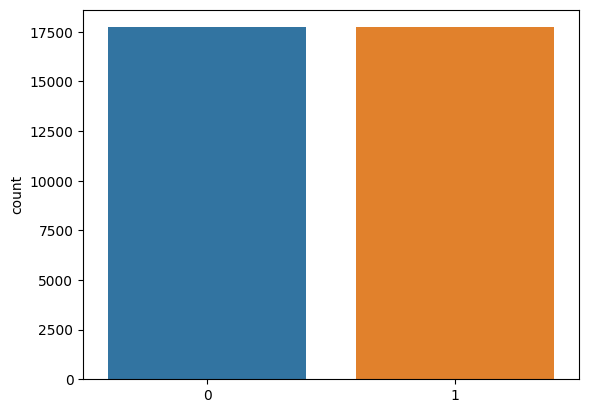

In [26]:
sns.countplot(x = y_res_treino)